# Data Science 325

## Clustering

### Learning Objectives:

* Students will learn the motivation for clustering techniques.
* Students will be exposed to two algorithmic approaches to clustering: kMeans, DBSCAN
* Students will practice the application of these techniques and visualize their results

## load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)

We start by loading the data:

In [2]:
from sklearn.datasets import load_digits
digits, labels_actual = load_digits(return_X_y=True)
X_std = StandardScaler().fit_transform(digits)

In [3]:
#just to help visualize
tsne = TSNE(random_state=0, perplexity=30)
projected = tsne.fit_transform(X_std)  # project from 64 to 

### Elbow plot:  deciding number of clusters

In [4]:
kMax = 15
ks  = np.linspace(2,kMax,kMax-1).astype(int)
e_score = np.zeros(ks.shape)
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters = k).fit(projected)
    e_score[i] = kmeans.inertia_  ## -kmeans.score(X)  

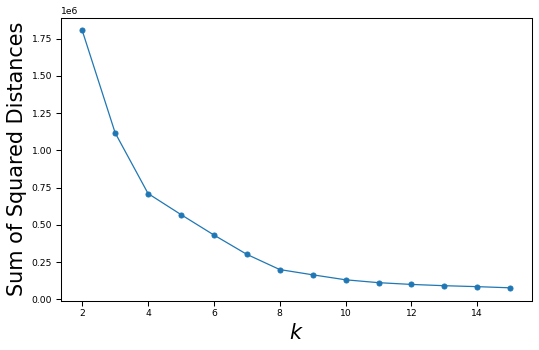

In [5]:
fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.plot(ks,e_score,'o-');
plt.xlabel('$k$', fontsize=20)
plt.ylabel('Sum of Squared Distances', fontsize=20);

However, there is no clear elbow.  This is always best to try first, its quicker than Silhouette and worth a try.

### Silhouette

lets try using the silhouette to find the optimal **k**.

The silhouette Coefficient = 

$$\dfrac{(x-y)}{ max(x,y)}$$

* here y is the mean intra cluster distance: mean distance to the other instances in the same cluster. 
* x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster.


Silhouette index (overall average silhouette) a larger Silhouette value indicates a better quality of a clustering result [Chen et al. 2002]

| Silhouette score | note | 
| --- | --- | 
| 0.71-1.0  | A strong structure has been found |
| 0.51-0.70 | A reasonable structure has been found |
| 0.26-0.50 | The structure is weak and could be artificial. Try additional methods of data analysis. |
| < 0.25 | No substantial structure has been found |

In [6]:
kMax = 20
ks  = np.linspace(2,kMax,kMax-1).astype(int)
s_score = np.zeros(ks.shape)
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters = k).fit(projected)
    #kmeans = KMeans(n_clusters = k).fit(X_std)    
    labels = kmeans.labels_
    s_score[i] = silhouette_score(projected, labels, metric = 'euclidean')

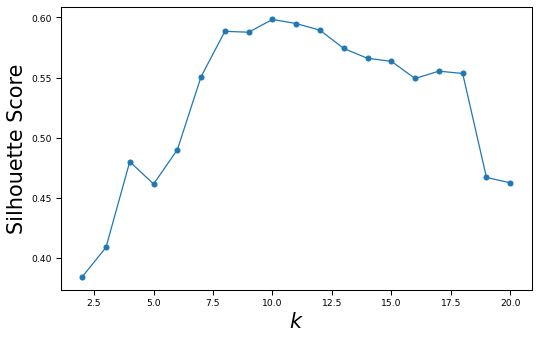

In [7]:
fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.plot(ks,s_score,'o-');
plt.xlabel('$k$', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20);

Our sihouette score is small, but there is a nice local peak around **10**.

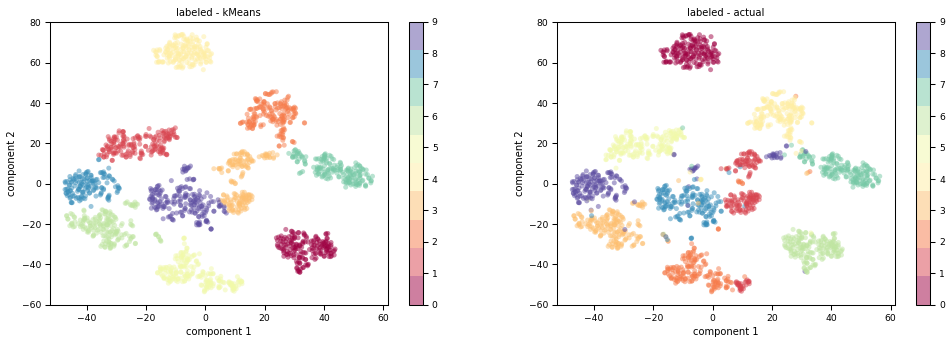

In [8]:
kBest = 10
kmeans = KMeans(n_clusters = kBest).fit(projected)
#kmeans = KMeans(n_clusters = kBest).fit(X_std)
labels = kmeans.labels_
fig = plt.figure(figsize = (16,5),dpi=75)
fig.add_subplot(121)   #top left
plt.scatter(projected[:, 0], projected[:, 1],c=labels, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - kMeans')
plt.colorbar();
fig.add_subplot(122)   #top left
plt.scatter(projected[:, 0], projected[:, 1],c=labels_actual, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - actual')
plt.colorbar();

Looks like kMeans did a great job of clustering the data.  There are some problems (like the kMeans did not distinguish the **d=3** & **d=9** cluster).

Lets try with **k=10** instead of 9.

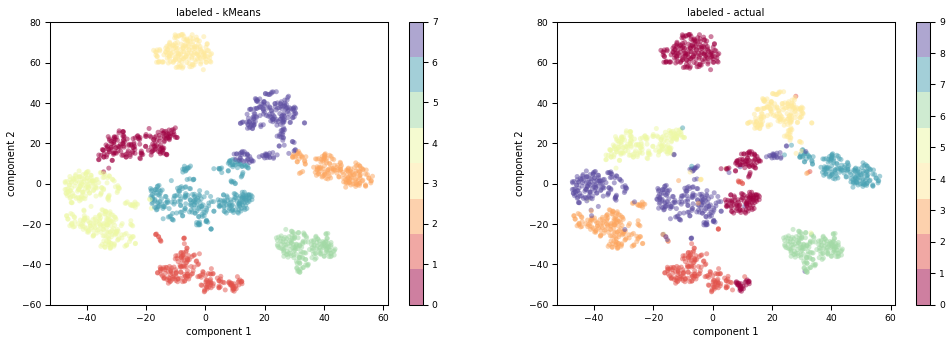

In [9]:
kBest = 8
kmeans = KMeans(n_clusters = kBest).fit(projected)
labels = kmeans.labels_
fig = plt.figure(figsize = (16,5),dpi=75)
fig.add_subplot(121)   #top left
plt.scatter(projected[:, 0], projected[:, 1],c=labels, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - kMeans')
plt.colorbar();
fig.add_subplot(122)   #top left
plt.scatter(projected[:, 0], projected[:, 1],c=labels_actual, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - actual')
plt.colorbar();

It helps to know how many clusters we are expecting.  But that is kinda the point here.  If we are using kMeans, then we have to decide how many clusters there are (using Elbow or Silhouette methods).  

If we **know** how many clusters there are, the we can use kNN (discussed in lecture) which is a supervised training algorithm.  More on that coming later.  Back to **unsupervised** clustering.

## DBscan

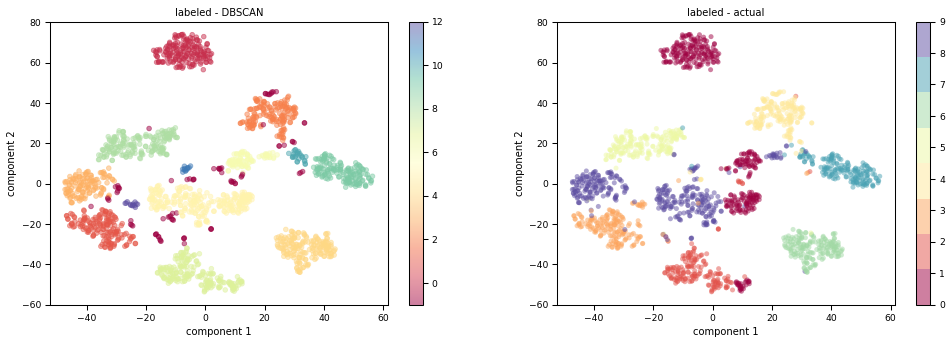

In [10]:
db = DBSCAN(eps=3, min_samples=10).fit(projected)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
fig = plt.figure(figsize = (16,5),dpi=75)
fig.add_subplot(121)   #top left
plt.scatter(projected[:, 0], projected[:, 1], c=db.labels_, s=20, alpha=0.5,cmap='Spectral');
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - DBSCAN')
plt.colorbar();
fig.add_subplot(122)   #top left
plt.scatter(projected[:, 0], projected[:, 1],c=labels_actual, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - actual')
plt.colorbar();

Arguably better segmentation than the above kMeans.  

Are the data from the center cluster (d=0 and d=8) really different clusters?

Again, here the problem may not be with kMeans or DBSCAN in segmenting the clusters, but whether these clusters are distinct.  This is always an issuee that needs to be discussed when using unsupervised clustering.

Next, lets explore what the DBSCAN parameters do.

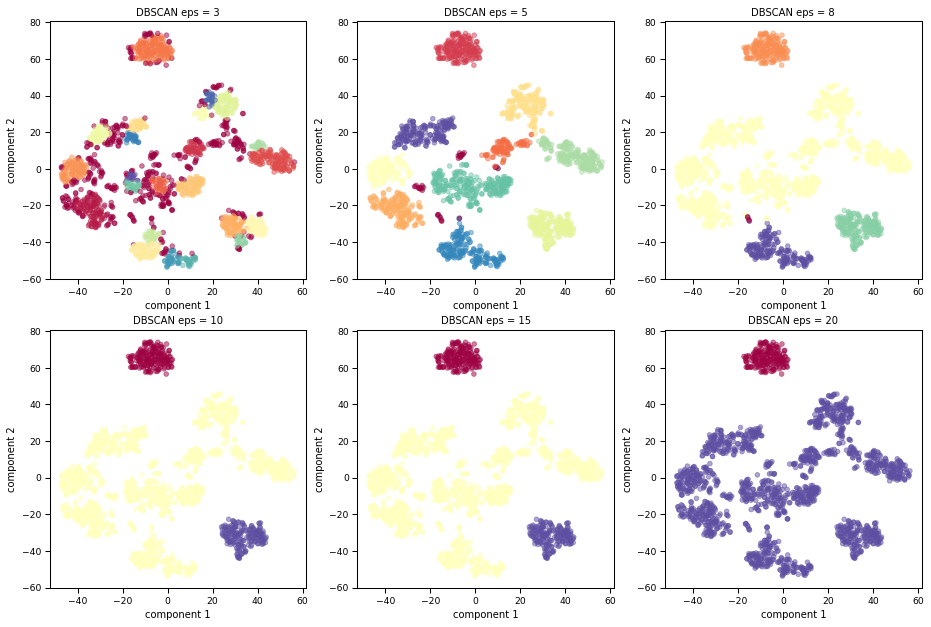

In [11]:
#try three different epsilon values
eps_array = np.array([3,5,8,10,15,20])
fig, ax = plt.subplots(2, 3,figsize=(15,10),dpi=75)
ax = ax.flat
for i in range(eps_array.shape[0]):
    my_eps = eps_array[i]
    db = DBSCAN(eps=my_eps, min_samples=20).fit(projected)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    ax[i].scatter(projected[:, 0], projected[:, 1], c=db.labels_, s=20, alpha=0.5,cmap='Spectral');
    ax[i].set_xlabel('component 1')
    ax[i].set_ylabel('component 2')
    ax[i].set_title('DBSCAN eps = %d'%my_eps)
    #plt.colorbar();

Epsilon plays a big role, and it helps to visualize the data before choosing epsilon.
* If epsilon is too small, everything is in its own cluster.  
* If epsilon is too large, everything is just one cluster.


Now lets look at min_samples.

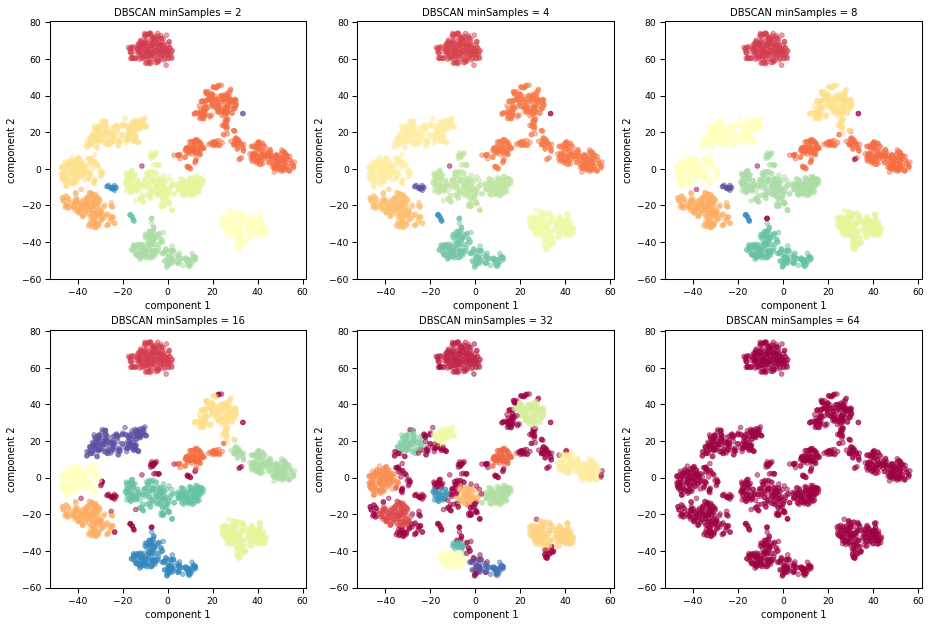

In [12]:
#try three different min_samples values
my_eps = 4
min_samp_array = np.array([2,4,8,16,32,64])
fig, ax = plt.subplots(2, 3,figsize=(15,10),dpi=75)
ax = ax.flat
for i in range(min_samp_array.shape[0]):
    samp = min_samp_array[i]
    db = DBSCAN(eps=my_eps, min_samples=samp).fit(projected)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    ax[i].scatter(projected[:, 0], projected[:, 1], c=db.labels_, s=20, alpha=0.5,cmap='Spectral');
    ax[i].set_xlabel('component 1')
    ax[i].set_ylabel('component 2')
    ax[i].set_title('DBSCAN minSamples = %d'%samp)

Min samples is also crucial to choose wisely.
* If min_samples is too small, everything is in its own cluster.  
* If min_samples is too large, everything is just one cluster.

Kinda the same as epsilon, but for different reason.  
 
#### Setting min_samples larger helps merge **satellite** outliers with a nearby cluster.